In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import glob
import cv2

In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [28]:
image_path = './original_images/1.png'
ref_licence_path = './templated-images/drivers_licence_text.png'
ref_nsw_path = './templated-images/nsw_text.jpeg'
flower_path = './templated-images/flower.jpg'

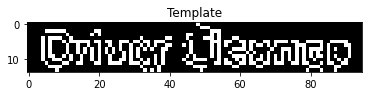

In [26]:
template = cv2.imread(ref_licence_path)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
plt_imshow("Template", template)

In [31]:
def match_doc_template(image_path, template):
    # loop over the images to find the template in
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None

    # loop over the scales of the image
    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        # resize the image according to the scale, and keep track
        # of the ratio of the resizing
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])

        # if the resized image is smaller than the template, then break
        # from the loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        # detect edges in the resized, grayscale image and apply template
        # matching to find the template in the image
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        clone = np.dstack([edged, edged, edged])
        cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
        (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)

        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

    # draw a bounding box around the detected result and display the image
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    plt_imshow("Image", image)


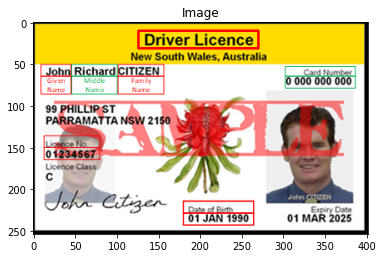

In [32]:
match_doc_template(image_path, template)

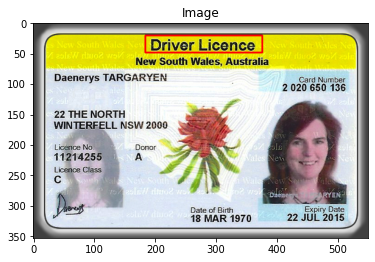

In [34]:
image_path = './original_images/0.png'
match_doc_template(image_path, template)

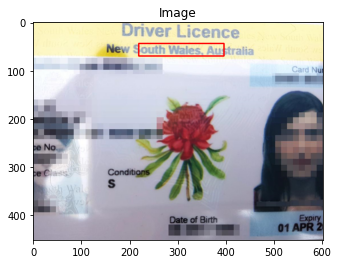

In [35]:
image_path = './original_images/5.png'
match_doc_template(image_path, template)

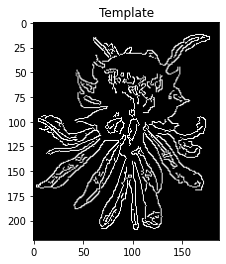

In [37]:
flower_template = cv2.imread(flower_path)
flower_template = cv2.cvtColor(flower_template, cv2.COLOR_BGR2GRAY)
flower_template = cv2.Canny(flower_template, 50, 200)
(tH, tW) = flower_template.shape[:2]
plt_imshow("Template", flower_template)

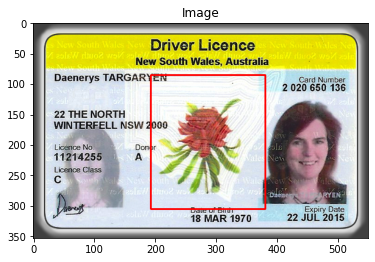

In [38]:
image_path = './original_images/0.png'
match_doc_template(image_path, flower_template)

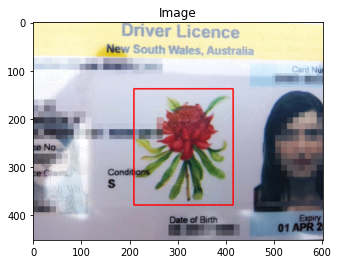

In [39]:
image_path = './original_images/5.png'
match_doc_template(image_path, flower_template)

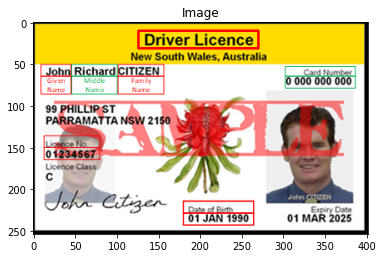

In [27]:
# loop over the images to find the template in
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None

# loop over the scales of the image
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])

    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

    clone = np.dstack([edged, edged, edged])
    cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
    (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)

    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

# draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
plt_imshow("Image", image)


In [23]:
image_path = './original_images/5.png'

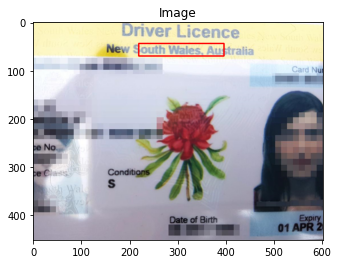

In [24]:
# loop over the images to find the template in
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None

# loop over the scales of the image
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])

    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

    clone = np.dstack([edged, edged, edged])
    cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
    (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)

    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

# draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
plt_imshow("Image", image)
